In [20]:

#Generate GMM from gaussian distribution and binomial distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import seaborn as sns
import math


# plt.rcParams["text.usetex"] =True


# Generate random gaussian distribution
mu1, sigma1 = 5, 10
mu2, sigma2, weight2 = 10, 15, 0.5
mu3, sigma3, weight3 = 4, 10, 0.5

# option2 = np.random.binomial(1, 0.5, size=20)
# print(option2)

# data0 = np.random.normal(mu1, math.sqrt(sigma1), size=1000)
# data1 = weight2 * np.random.normal(mu2, math.sqrt(sigma2), size=1000) + weight3 * np.random.normal(mu3, math.sqrt(sigma3), size=1000)



# print(data1.shape)
# print(data2.shape)


# Part A

In [21]:
# Number of steps
k = 1000
num_runs = 100

# Learning rates
alpha = [1, 0.9**k, 1/(1+np.log(1+k)), 1/k]

# Epsilon values
epsilon = [0, 0.1, 0.2, 0.5]

data0 = np.zeros((num_runs, k))
data1 = np.zeros((num_runs, k))

for m in range(num_runs):
    data0[m, :] = np.random.normal(mu1, math.sqrt(sigma1), size=k)
    data1[m, :] = weight2 * np.random.normal(mu2, math.sqrt(sigma2), size=k) + weight3 * np.random.normal(mu3, math.sqrt(sigma3), size=k)


print(np.mean(data1, axis=(0,1)))


7.017496114680416


## For $\alpha$ = 1

6.50924113954648

Epsilon =  0
Q_a1:  4.023925173203182
Q_a2:  5.078316355334567
6.509353075820178

Epsilon =  0.1
Q_a1:  4.045434445676948
Q_a2:  5.075712679612741
6.502834610779818

Epsilon =  0.2
Q_a1:  4.0530000036699905
Q_a2:  5.060037540944259
6.515202099998671

Epsilon =  0.5
Q_a1:  4.051102335396704
Q_a2:  5.047450703022946


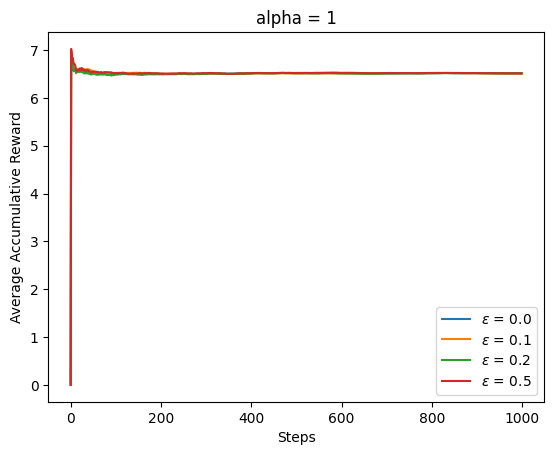

In [22]:
# Number of steps
k = 1000
num_runs = 100

# Learning rates
alpha = [1, 0.9**k, 1/(1+np.log(1+k)), 1/k]

# Epsilon values
epsilon = [0, 0.1, 0.2, 0.5]


Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the epsilons
for i in range(len(epsilon)):
    
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = 0
        Q[m,0,1] = 0
        
        # Looping through all of the steps
        for j in range(k-1):    
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon[i]:
                action = np.argmax(Q[m,j,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                R[m,j+1,action] = data0[m,j]
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = data0[m,j]
                else:
                    action = 1
                    R[m,j+1,action] = data1[m,j]
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + (alpha[0] * (Reward[m,j+1] - Q[m,j,action]))
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]


        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n+1
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    Mean_AccRkBar = np.mean(AccRewardPerStep, axis=(0,1))
    print(Mean_AccRkBar)

    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(0,1))
    print("\nEpsilon = ", epsilon[i])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])
    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    plt.title('alpha = 1')
    plt.legend(['$\epsilon$ = 0.0', '$\epsilon$ = 0.1', '$\epsilon$ = 0.2', '$\epsilon$ = 0.5'], loc ="lower right")
plt.show()


## For $\alpha = 0.9^k$

6.487708280356891

Epsilon =  0
Q_a1:  4.734616889148335
Q_a2:  4.245241969508156
6.47970414922253

Epsilon =  0.1
Q_a1:  4.464993957396702
Q_a2:  4.417802092617593
6.4860732531835446

Epsilon =  0.2
Q_a1:  4.400213737202647
Q_a2:  4.217407089054221
6.471239345923716

Epsilon =  0.5
Q_a1:  4.3957090002912516
Q_a2:  4.595971443369072


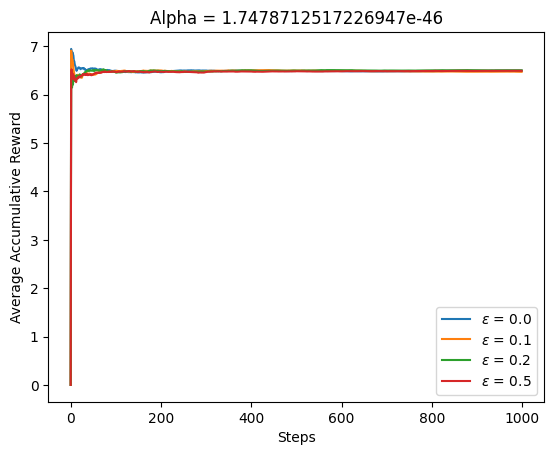

In [23]:
Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the epsilons
for i in range(len(epsilon)):
    
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = 0
        Q[m,0,1] = 0
        
        # Looping through all of the steps
        for j in range(k-1):
            # Calculate the reward for action 0
            Q[m,j+1,0] = Q[m,j,0] + alpha[1] * (R[m,j,0] - Q[m,j,0])
            
            # Calculate the reward for action 1
            Q[m,j+1,1] = Q[m,j,1] + alpha[1] * (R[m,j,1] - Q[m,j,1])
            
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon[i]:
                action = np.argmax(Q[m,j+1,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                else:
                    action = 1
                    option2 = np.random.binomial(1, 0.5)
                    if option2 == 0:
                        R[m,j+1,action] = np.random.normal(mu2, np.sqrt(sigma2))
                    else:
                        R[m,j+1,action] = np.random.normal(mu3, np.sqrt(sigma3))
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + alpha[0] * (Reward[m,j+1] - Q[m,j,action])
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]

        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n+1
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    Mean_AccRkBar = np.mean(AccRewardPerStep, axis=(0,1))
    print(Mean_AccRkBar)
   
    
    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(1,2))
    print("\nEpsilon = ", epsilon[i])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])

    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    plt.title('Alpha = '+str(alpha[1])+'')
    plt.legend(['$\epsilon$ = 0.0', '$\epsilon$ = 0.1', '$\epsilon$ = 0.2', '$\epsilon$ = 0.5'], loc ="lower right")
plt.show()


## For $\alpha = \frac{1}{1+\ln(1+k)}$

6.470110994905944

Epsilon =  0
Q_a1:  4.494952299578821
Q_a2:  4.550973619840952
6.474425899060412

Epsilon =  0.1
Q_a1:  4.2882946622835005
Q_a2:  4.283265193334067
6.4727633050193525

Epsilon =  0.2
Q_a1:  4.401243217761721
Q_a2:  4.521366948193698
6.491049740615469

Epsilon =  0.5
Q_a1:  4.298117826521636
Q_a2:  4.254037480118055


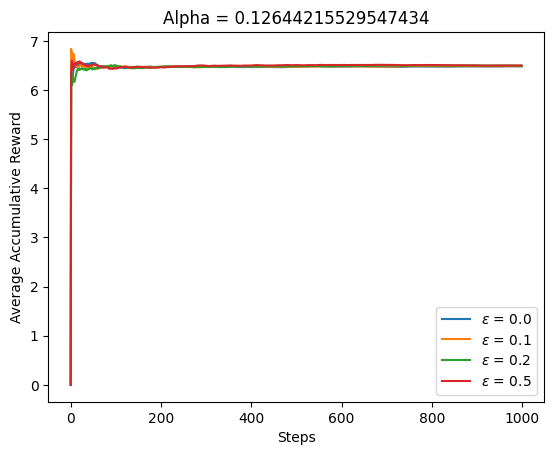

In [24]:
Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the epsilons
for i in range(len(epsilon)):
    
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = 0
        Q[m,0,1] = 0
        
        # Looping through all of the steps
        for j in range(k-1):
            # Calculate the reward for action 0
            Q[m,j+1,0] = Q[m,j,0] + alpha[2] * (R[m,j,0] - Q[m,j,0])
            
            # Calculate the reward for action 1
            Q[m,j+1,1] = Q[m,j,1] + alpha[2] * (R[m,j,1] - Q[m,j,1])
            
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon[i]:
                action = np.argmax(Q[m,j+1,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                else:
                    action = 1
                    option2 = np.random.binomial(1, 0.5)
                    if option2 == 0:
                        R[m,j+1,action] = np.random.normal(mu2, np.sqrt(sigma2))
                    else:
                        R[m,j+1,action] = np.random.normal(mu3, np.sqrt(sigma3))
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + alpha[0] * (Reward[m,j+1] - Q[m,j,action])
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]

        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n+1
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    Mean_AccRkBar = np.mean(AccRewardPerStep, axis=(0,1))
    print(Mean_AccRkBar)
    
    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(1,2))
    print("\nEpsilon = ", epsilon[i])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])

    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    plt.title('Alpha = '+str(alpha[2])+'')
    plt.legend(['$\epsilon$ = 0.0', '$\epsilon$ = 0.1', '$\epsilon$ = 0.2', '$\epsilon$ = 0.5'], loc ="lower right")
plt.show()


## For $\alpha = \frac{1}{k}$

6.492398485373766

Epsilon =  0
Q_a1:  4.615642411297433
Q_a2:  4.2167959424939925
6.503006778653307

Epsilon =  0.1
Q_a1:  4.382023310078881
Q_a2:  4.421767462668379
6.49676766741957

Epsilon =  0.2
Q_a1:  4.2115210867042245
Q_a2:  4.060936959810257
6.4943709743033695

Epsilon =  0.5
Q_a1:  4.4777465718254374
Q_a2:  4.469805612216288


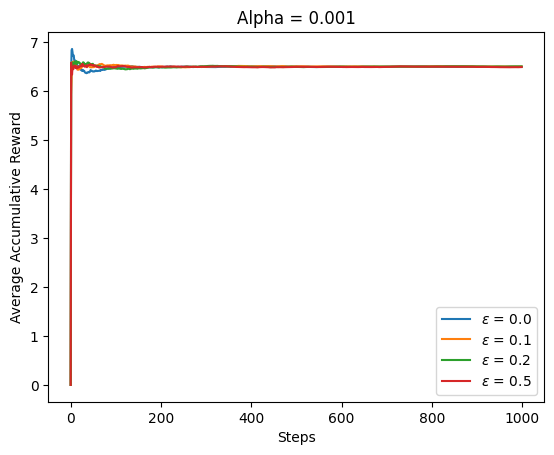

In [25]:
Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the epsilons
for i in range(len(epsilon)):
    
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = 0
        Q[m,0,1] = 0
        
        # Looping through all of the steps
        for j in range(k-1):
            # Calculate the reward for action 0
            Q[m,j+1,0] = Q[m,j,0] + alpha[3] * (R[m,j,0] - Q[m,j,0])
            
            # Calculate the reward for action 1
            Q[m,j+1,1] = Q[m,j,1] + alpha[3] * (R[m,j,1] - Q[m,j,1])
            
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon[i]:
                action = np.argmax(Q[m,j+1,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                else:
                    action = 1
                    option2 = np.random.binomial(1, 0.5)
                    if option2 == 0:
                        R[m,j+1,action] = np.random.normal(mu2, np.sqrt(sigma2))
                    else:
                        R[m,j+1,action] = np.random.normal(mu3, np.sqrt(sigma3))
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + alpha[0] * (Reward[m,j+1] - Q[m,j,action])
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]

        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n+1
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    Mean_AccRkBar = np.mean(AccRewardPerStep, axis=(0,1))
    print(Mean_AccRkBar)
    
    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(1,2))
    print("\nEpsilon = ", epsilon[i])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])

    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    plt.title('Alpha = '+str(alpha[3])+'')
    plt.legend(['$\epsilon$ = 0.0', '$\epsilon$ = 0.1', '$\epsilon$ = 0.2', '$\epsilon$ = 0.5'], loc ="lower right")
plt.show()


# Part B



Initial Q values =  [0 0]
Q_a1:  4.702934751659912
Q_a2:  5.56219354711309


Initial Q values =  [5 7]
Q_a1:  4.82648000747604
Q_a2:  5.699173451638715


Initial Q values =  [20 20]
Q_a1:  5.143940262450411
Q_a2:  5.9620781729170425


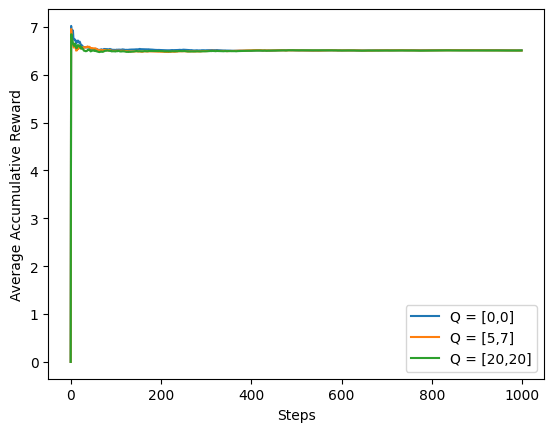

In [26]:
alpha = 0.1
epsilon = 0.1

Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))

init_Q = np.array([[0,0],[5,7],[20,20]])


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the initial Q values
for q in range(len(init_Q)):
    
    print("")
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = init_Q[q,0]  
        Q[m,0,1] = init_Q[q,1]
        
        # Looping through all of the steps
        for j in range(k-1):
            
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon:
                action = np.argmax(Q[m,j,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                R[m,j+1,action] = data0[m,j]
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = data0[m,j]
                else:
                    action = 1
                    R[m,j+1,action] = data1[m,j]
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + alpha * (Reward[m,j+1] - Q[m,j,action])
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]

        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n+1
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    
    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(0,1))
    print("\nInitial Q values = ", init_Q[q])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])

    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    # plt.title('Alpha = '+str(alpha)+'')
    plt.legend(['Q = [0,0]','Q = [5,7]','Q = [20,20]'], loc ="lower right")       # Check whether the legend is corrects
plt.show()

# Part C

For fix alpha, use Gradient Bandit Policy with $H_1(a^1)= H_1(a^2)=0$

In [29]:


num_runs = 100
k = 1000

alpha = 0.1
epsilon = 0.1

Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccReward = np.zeros((k, num_runs))

H = np.zeros((num_runs,k,2))
pi = np.zeros((num_runs,k,2))

SumReward = 0

init_Q = np.array([[0,0],[5,7],[20,20]])

# Calculate the policy for all actions
def calc_policy(Ha, Hb):
    pi_a = math.exp(Ha)/(math.exp(Ha) + math.exp(Hb))
    pi_b = 1-pi_a
    
    return pi_a, pi_b

# Calculate the H values for selected and other actions
def calc_H(Ha, Hb, pi_a, pi_b, current_reward, avg_reward):
    H_selected = Ha + (alpha * (current_reward - avg_reward) * (1 - pi_a))
    H_others = Hb - (alpha * (current_reward - avg_reward) * pi_b)
    
    return H_selected, H_others


# Looping through all of the runs
for m in range(num_runs):
    H[m,0,0] = 0  
    H[m,0,1] = 0
    SumReward = 0
    
    # Looping through all of the steps
    for j in range(k-1):
        
        # Calculate the policy for all actions
        pi[m,j,:] = calc_policy(H[m,j,0], H[m,j,1])
        
        # Choose an action
        action = np.random.binomial(n=1, p=pi[m,j,0],size=1)
        if action == 0:
            # Get the reward from normal distribution
            Reward[m,j] = np.random.normal(mu1, np.sqrt(sigma1))
            
            H[m,j+1,0], H[m,j+1,1] = calc_H(H[m,j,0], H[m,j,1], pi[m,j,action], pi[m,j,1], Reward[m,j], (SumReward/(j+1)))
        else:
            option2 = np.random.binomial(1, 0.5)
            if option2 == 0:
                Reward[m,j] = np.random.normal(mu2, np.sqrt(sigma2))
            else:
                Reward[m,j] = np.random.normal(mu3, np.sqrt(sigma3))
                
            H[m,j+1,1], H[m,j+1,0] = calc_H(H[m,j,1], H[m,j,0], pi[m,j,action], pi[m,j,0], Reward[m,j], (SumReward/(j+1)))
            
        
        SumReward = Reward[m,j] + SumReward
        AccReward[j+1,m] = SumReward/(j+1)
    
    # print("")


AccRkBar = np.mean(AccReward, axis=1)

plt.plot(AccRkBar)
plt.title('Epsilon-Greedy vs Gradient Bandit')
# plt.legend(['Q = [0,0]','Q = [5,7]','Q = [20,20]'], loc ="lower right")       # Check whether the legend is corrects
# plt.show()

alpha = 0.1
epsilon = 0.1

Q = np.zeros((num_runs,k,2))
R = np.zeros((num_runs,k,2))
Reward = np.zeros((num_runs,k))
AccRewardPerStep = np.zeros((k, num_runs))

init_Q = np.array([[0,0]])


# Geneate random number between 0 and 1 for initial action selection
p = np.random.randint(2)

# Looping through all of the initial Q values
for q in range(len(init_Q)):
    
    print("")
    # Looping through all of the runs
    for m in range(num_runs):
        Q[m,0,0] = init_Q[q,0]  
        Q[m,0,1] = init_Q[q,1]
        
        # Looping through all of the steps
        for j in range(k-1):     
            # Choose the action based on epsilon-greedy
            p = np.random.randint(2)
            if p > epsilon:
                action = np.argmax(Q[m,j+1,:])
                R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
            else:
                option1 = np.random.randint(2)
                if option1 == 0:
                    action = 0
                    R[m,j+1,action] = np.random.normal(mu1, np.sqrt(sigma1))
                else:
                    action = 1
                    option2 = np.random.binomial(1, 0.5)
                    if option2 == 0:
                        R[m,j+1,action] = np.random.normal(mu2, np.sqrt(sigma2))
                    else:
                        R[m,j+1,action] = np.random.normal(mu3, np.sqrt(sigma3))
                
            Reward[m,j+1] = R[m,j+1,action]
            Q[m,j+1,action] = Q[m,j,action] + alpha * (Reward[m,j+1] - Q[m,j,action])
            
            if action == 0:
                Q[m,j+1,1] = Q[m,j,1]
            elif action == 1:
                Q[m,j+1,0] = Q[m,j,0]

        
            AccRewardPerStep[j+1,m] = Reward[m,j+1] + AccRewardPerStep[j,m]
    
    # Calculate the average reward per step
    m=0
    n=0
    for m in range(num_runs):
        for n in range(k):
            if n == 0:
                AccRewardPerStep[n,m] = 0
            else:
                AccRewardPerStep[n,m] = AccRewardPerStep[n,m]/n
    
    
    AccRkBar = np.mean(AccRewardPerStep, axis=1)
    
    # Calculate the average Q values
    Mean_Q = np.mean(Q, axis=(0,1))
    print("\nInitial Q values = ", init_Q[q])
    print("Q_a1: ", Mean_Q[0])
    print("Q_a2: ", Mean_Q[1])

    
    # plt.figure()
    plt.plot(AccRkBar)
    plt.xlabel('Steps')
    plt.ylabel('Average Accumulative Reward')
    plt.legend(['Epsilon-Greedy','Gradient-Bandit]'], loc ="lower right")       # Check whether the legend is corrects
plt.show()

/var/folders/pm/5zf3ncv54zsd0m9nz21zl1xr0000gn/T/ipykernel_37529/315549402.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[m,j+1,0], H[m,j+1,1] = calc_H(H[m,j,0], H[m,j,1], pi[m,j,action], pi[m,j,1], Reward[m,j], (SumReward/(j+1)))
/var/folders/pm/5zf3ncv54zsd0m9nz21zl1xr0000gn/T/ipykernel_37529/315549402.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  H[m,j+1,1], H[m,j+1,0] = calc_H(H[m,j,1], H[m,j,0], pi[m,j,action], pi[m,j,0], Reward[m,j], (SumReward/(j+1)))
